In [1]:
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
path = Path.cwd()

Now we load and view the Jester data set, as can be seen below it is a crosstabulated dataframe at the moment. As we wish to use the FastAI CollabDataLoaders we must massage the table into a table with a columb for UserId (1-54905) JokeID(1-150) and the assosiated rating

In [87]:
data_raw = pd.read_excel(path/'data'/'dataset.xls', header=None, 
                         usecols=[i for i in range(1, 151)])

In [88]:
data_raw

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,99,99,99,99,-9.68750,99,9.93750,9.53125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,99,99,99,99,6.90625,99,4.75000,-5.90625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,99,99,99,99,99.00000,99,-6.53125,-2.34375,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
54901,99,99,99,99,99.00000,99,8.93750,9.78125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
54902,99,99,99,99,99.00000,99,-1.59375,4.53125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
54903,99,99,99,99,99.00000,99,-7.40625,6.93750,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


First, as the documentation accompanying the data set indicated that a score of 99 means the joke was not rated we replace them with NaN

In [89]:
data_raw.loc[:, 0:151] = data_raw.loc[:, 0:151].replace([99.], np.nan)

In [54]:
data_raw

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,NaN,NaN,NaN,NaN,0.21875,NaN,-9.28125,-9.28125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,-9.6875,NaN,9.9375,9.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-9.84375,NaN,-9.84375,-7.21875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,6.90625,NaN,4.75,-5.90625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.03125,NaN,-9.09375,-0.40625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,NaN,NaN,NaN,NaN,NaN,NaN,-6.53125,-2.34375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54901,NaN,NaN,NaN,NaN,NaN,NaN,8.9375,9.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54902,NaN,NaN,NaN,NaN,NaN,NaN,-1.59375,4.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54903,NaN,NaN,NaN,NaN,NaN,NaN,-7.40625,6.9375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next we must setup an appropriate column containing the user IDs

In [90]:
data_raw["user_id"] = [i for i in range(1, 54906)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [91]:
data_raw

,1,2,3,4,5,6,7,8,9,10,...,142,143,144,145,146,147,148,149,150,user_id
0,NaN,NaN,NaN,NaN,0.21875,NaN,-9.28125,-9.28125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,-9.68750,NaN,9.93750,9.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,-9.84375,NaN,-9.84375,-7.21875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,6.90625,NaN,4.75000,-5.90625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,-0.03125,NaN,-9.09375,-0.40625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,NaN,NaN,NaN,NaN,NaN,NaN,-6.53125,-2.34375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54901
54901,NaN,NaN,NaN,NaN,NaN,NaN,8.93750,9.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54902
54902,NaN,NaN,NaN,NaN,NaN,NaN,-1.59375,4.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54903
54903,NaN,NaN,NaN,NaN,NaN,NaN,-7.40625,6.93750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54904


We must also remove the columns which correspond to out of date unrated jokes as stated in the Jester dataset documentation. These are jokes with ids = {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116}

In [92]:
data_raw = data_raw.drop([1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 20, 27, 31, 43, 51, 52, 61, 73, 80, 100, 116], axis=1)

In [93]:
data_raw

,7,8,13,15,16,17,18,19,21,22,...,142,143,144,145,146,147,148,149,150,user_id
0,-9.28125,-9.28125,-6.78125,0.87500,-9.65625,-9.03125,-7.46875,-8.71875,-7.18750,-8.78125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9.93750,9.53125,9.93750,0.40625,3.71875,9.65625,-2.68750,-9.56250,9.84375,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,-9.84375,-7.21875,-2.03125,-9.93750,-9.96875,-9.87500,-9.81250,-9.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4.75000,-5.90625,-0.40625,-4.03125,3.87500,6.21875,5.65625,6.09375,6.37500,7.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,-9.09375,-0.40625,7.50000,-7.21875,-9.43750,0.12500,-9.15625,3.65625,7.90625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,-6.53125,-2.34375,1.43750,-4.37500,-9.90625,-4.06250,-3.93750,-9.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54901
54901,8.93750,9.78125,9.53125,9.50000,9.93750,9.87500,9.96875,9.96875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54902
54902,-1.59375,4.53125,-9.21875,-3.09375,-1.96875,1.12500,-5.93750,-4.34375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54903
54903,-7.40625,6.93750,-8.00000,-5.40625,-0.03125,5.15625,-3.62500,4.15625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54904


In [94]:
data_raw.melt(id_vars=['user_id'], var_name='joke_id', value_name='rating')[1*54905-5:1*54905+5]

,user_id,joke_id,rating
54900,54901,7,-6.53125
54901,54902,7,8.93750
54902,54903,7,-1.59375
54903,54904,7,-7.40625
54904,54905,7,4.25000
54905,1,8,-9.28125
54906,2,8,9.53125
54907,3,8,-7.21875
54908,4,8,-5.90625
54909,5,8,-0.40625


If we compare the above segment with the bottom of the first column (joke_id=7), and the top of the second column (joke_id=8) in the crosstabed data set we can see that both user IDs and joke IDs and rating were extracted succesfully. Hence we can save our un crosstabbed dataframe

In [95]:
data = data_raw.melt(id_vars=['user_id'], var_name='joke_id', value_name='rating')

We should also remove all the rows where the rating is NaN

In [96]:
data

,user_id,joke_id,rating
0,1,7,-9.28125
1,2,7,9.93750
2,3,7,-9.84375
3,4,7,4.75000
4,5,7,-9.09375
...,...,...,...
7027835,54901,150,NaN
7027836,54902,150,NaN
7027837,54903,150,NaN
7027838,54904,150,NaN


In [99]:
data = data.dropna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


success!!! Data is ready for learning

In [100]:
joke_dls = CollabDataLoaders.from_df(data, bs=128, user_name='user_id', item_name='joke_id',
                                     rating_name='rating', seed=42, shuffle=True)
joke_dls.show_batch()

,user_id,joke_id,rating
0,15393,125,-7.53125
1,1628,26,0.31250
2,40282,57,7.12500
3,42304,93,9.59375
4,15086,16,4.93750
5,34957,98,-1.87500
6,585,17,3.75000
7,8121,7,8.68750
8,31297,79,0.93750
9,32254,35,0.93750


In [107]:
learner = collab_learner(joke_dls, n_factors=50, y_range=(-10.5, 10.5), wd=0.01).to_fp16()

SuggestedLRs(valley=0.010964781977236271)

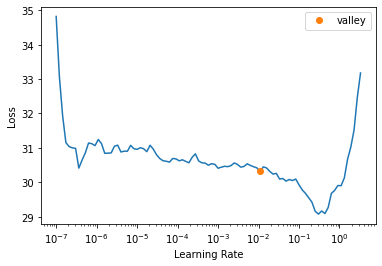

In [108]:
learner.lr_find()

In [110]:
learner.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,12.456340,19.737064,01:10
1,15.769727,19.682810,01:10
2,13.379601,18.493351,01:09
3,9.378862,17.878601,01:10
4,5.775450,18.421934,01:10


As we can see our learner is not learning and at all improving on the loss functions while taking above a minute to train per epoch. 

We will simplify the dataset to contain only 8 of the most rated jokes with 10000 of the users who have given the largest rating, and attempt to figure out a successful model for the smaller dataset.

In [111]:
data_raw

,7,8,13,15,16,17,18,19,21,22,...,142,143,144,145,146,147,148,149,150,user_id
0,-9.28125,-9.28125,-6.78125,0.87500,-9.65625,-9.03125,-7.46875,-8.71875,-7.18750,-8.78125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9.93750,9.53125,9.93750,0.40625,3.71875,9.65625,-2.68750,-9.56250,9.84375,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,-9.84375,-7.21875,-2.03125,-9.93750,-9.96875,-9.87500,-9.81250,-9.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4.75000,-5.90625,-0.40625,-4.03125,3.87500,6.21875,5.65625,6.09375,6.37500,7.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,-9.09375,-0.40625,7.50000,-7.21875,-9.43750,0.12500,-9.15625,3.65625,7.90625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,-6.53125,-2.34375,1.43750,-4.37500,-9.90625,-4.06250,-3.93750,-9.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54901
54901,8.93750,9.78125,9.53125,9.50000,9.93750,9.87500,9.96875,9.96875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54902
54902,-1.59375,4.53125,-9.21875,-3.09375,-1.96875,1.12500,-5.93750,-4.34375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54903
54903,-7.40625,6.93750,-8.00000,-5.40625,-0.03125,5.15625,-3.62500,4.15625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54904


In [132]:
count_of_ratings = data_raw.count(axis=0)
(count_of_ratings == 54905)[0:].sum(),(count_of_ratings == 54905)[0:8]

(9,
 7     True
 8     True
 13    True
 15    True
 16    True
 17    True
 18    True
 19    True
 dtype: bool)

there are 8 jokes which have been rated by all users so let us begin with using those and a subset of users. They also happen to be the first 8 jokes

In [150]:
data_raw_small = data_raw.loc[0:9999, [7, 8, 13, 15, 16, 17, 18, 19, 'user_id']] 
data_raw_small

,7,8,13,15,16,17,18,19,user_id
0,-9.28125,-9.28125,-6.78125,0.87500,-9.65625,-9.03125,-7.46875,-8.71875,1
1,9.93750,9.53125,9.93750,0.40625,3.71875,9.65625,-2.68750,-9.56250,2
2,-9.84375,-7.21875,-2.03125,-9.93750,-9.96875,-9.87500,-9.81250,-9.78125,3
3,4.75000,-5.90625,-0.40625,-4.03125,3.87500,6.21875,5.65625,6.09375,4
4,-9.09375,-0.40625,7.50000,-7.21875,-9.43750,0.12500,-9.15625,3.65625,5
...,...,...,...,...,...,...,...,...,...
9995,-1.09375,1.59375,-8.56250,-6.68750,-5.03125,-3.75000,5.50000,3.90625,9996
9996,-2.53125,4.75000,5.25000,4.12500,3.31250,4.25000,5.78125,5.21875,9997
9997,2.12500,3.12500,-5.06250,-1.50000,0.34375,0.34375,5.90625,1.37500,9998
9998,8.37500,-0.40625,-7.37500,-8.81250,-8.68750,-5.06250,0.06250,6.87500,9999


In [157]:
data_small = data_raw_small.melt(id_vars=['user_id'], var_name='joke_id', value_name='rating')
data_small = data_small.dropna(0)
data_small['rating'] /= 10 # normalize data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


In [170]:
jokes_sm_dls = CollabDataLoaders.from_df(data_small, user_name='user_id', item_name='joke_id',
                                         rating_name='rating', seed=42, bs=64)

In [206]:
jokes_sm_dls.show_batch()

,user_id,joke_id,rating
0,8564,16,-0.525000
1,2624,8,-0.531250
2,841,18,-0.031250
3,6576,13,0.509375
4,9992,7,0.496875
5,2002,19,0.456250
6,7087,8,-0.775000
7,4160,16,-0.034375
8,6235,8,-0.378125
9,7039,17,0.925000


In [201]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.0001, y_range=(-1, 1)).to_fp16()

/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0691830962896347)

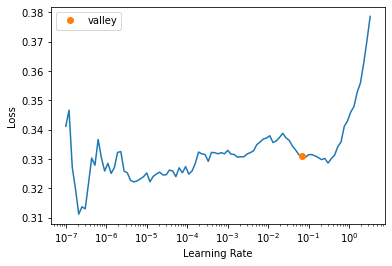

In [161]:
sm_learner.lr_find()

In [162]:
sm_learner.fit_one_cycle(5, 0.07)

epoch,train_loss,valid_loss,time
0,0.370627,0.365549,00:05
1,0.447097,0.566391,00:05
2,0.300802,0.428299,00:05
3,0.145726,0.327928,00:05
4,0.063553,0.301943,00:05


SuggestedLRs(valley=0.0030199517495930195)

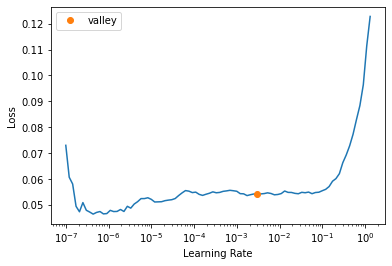

In [163]:
sm_learner.lr_find()

In [164]:
sm_learner.fit_one_cycle(15, 0.003)

epoch,train_loss,valid_loss,time
0,0.053574,0.302641,00:05
1,0.054348,0.302502,00:05
2,0.050359,0.303199,00:05
3,0.045372,0.302580,00:05
4,0.035936,0.303271,00:05
5,0.030783,0.303318,00:05
6,0.025497,0.304773,00:05
7,0.021832,0.305673,00:05
8,0.017147,0.306982,00:05
9,0.015768,0.306899,00:05


No improvements appear to be made to the validation_loss. At around 0.3 with loss being MSE that equates to on average the error being off by 0.5 on the scale of -1 to 1. Which is not ideal. We will try increasing the regularization now.

/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.04786301031708717)

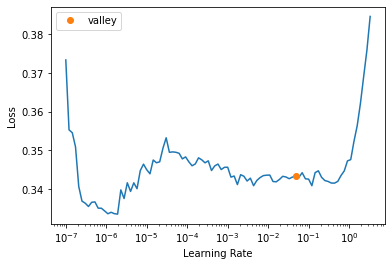

In [172]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.01, y_range=(-1, 1)).to_fp16()
sm_learner.lr_find()

In [173]:
sm_learner.fit_one_cycle(5, 0.05)

epoch,train_loss,valid_loss,time
0,0.300675,0.313541,00:05
1,0.276620,0.355365,00:05
2,0.150176,0.301968,00:05
3,0.057836,0.268486,00:05
4,0.022191,0.260550,00:05


SuggestedLRs(valley=0.015848932787775993)

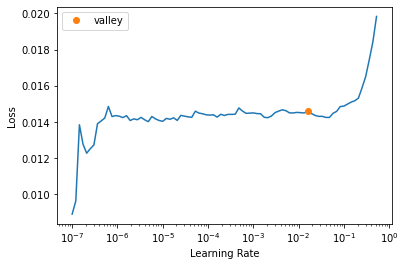

In [174]:
sm_learner.lr_find()

In [175]:
sm_learner.fit_one_cycle(15, 1e-3)

epoch,train_loss,valid_loss,time
0,0.014790,0.260893,00:05
1,0.014254,0.261371,00:05
2,0.013343,0.261531,00:05
3,0.011715,0.261829,00:05
4,0.009249,0.262200,00:05
5,0.007379,0.262138,00:05
6,0.006083,0.262601,00:05
7,0.004875,0.263238,00:05
8,0.004014,0.263574,00:05
9,0.003252,0.263688,00:05


The validation loss has improved but train loss is still much much smaller than validation loss which is indicative of a variance problem, hence regularisation should be increased

SuggestedLRs(valley=0.019054606556892395)

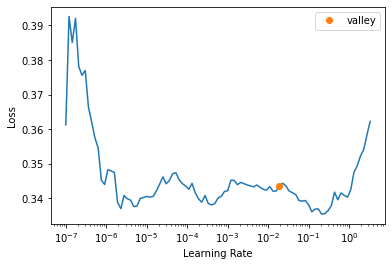

In [176]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.1, y_range=(-1, 1)).to_fp16()
sm_learner.lr_find()

In [177]:
sm_learner.fit_one_cycle(5, 2e-2)

epoch,train_loss,valid_loss,time
0,0.274997,0.276757,00:05
1,0.249071,0.265336,00:05
2,0.130051,0.263135,00:05
3,0.100944,0.251493,00:05
4,0.033766,0.250199,00:05


SuggestedLRs(valley=0.010964781977236271)

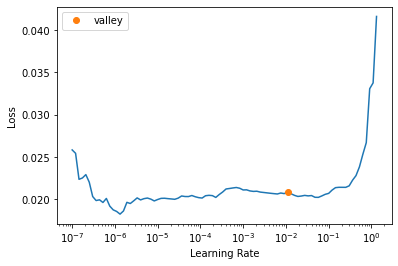

In [178]:
sm_learner.lr_find()

In [179]:
sm_learner.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,time
0,0.020120,0.250438,00:05
1,0.019556,0.260101,00:05
2,0.121031,0.263186,00:05
3,0.086314,0.258593,00:05
4,0.080841,0.258443,00:05
5,0.058273,0.254740,00:05
6,0.047637,0.254859,00:05
7,0.028450,0.251769,00:05
8,0.012651,0.252878,00:05
9,0.003860,0.252367,00:05


We are still overfitting the data :( although it is getting better, perhaphs lets try some more training data. Now 100k users

In [180]:
data_raw_small = data_raw.loc[0:99999, [7, 8, 13, 15, 16, 17, 18, 19, 'user_id']] 
data_small = data_raw_small.melt(id_vars=['user_id'], var_name='joke_id', value_name='rating')
data_small = data_small.dropna(0)
data_small['rating'] /= 10 # normalize data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


SuggestedLRs(valley=0.015848932787775993)

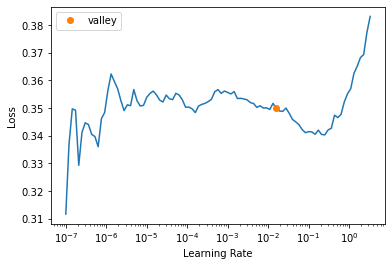

In [181]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.1, y_range=(-1, 1)).to_fp16()
sm_learner.lr_find()

In [182]:
sm_learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,time
0,0.282771,0.281363,00:05
1,0.283234,0.280027,00:05
2,0.203435,0.268704,00:05
3,0.120530,0.255897,00:05
4,0.052638,0.251612,00:05


SuggestedLRs(valley=0.0002290867705596611)

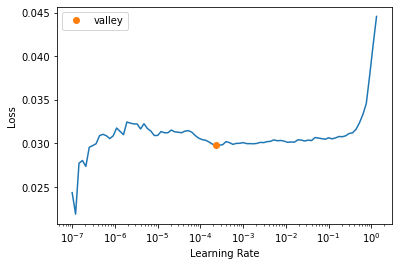

In [183]:
sm_learner.lr_find()

In [184]:
sm_learner.fit_one_cycle(10, 2e-4)

epoch,train_loss,valid_loss,time
0,0.029751,0.251692,00:05
1,0.028547,0.251883,00:05
2,0.026188,0.251857,00:05
3,0.022627,0.251692,00:05
4,0.018750,0.251638,00:05
5,0.016647,0.251599,00:05
6,0.013770,0.251637,00:05
7,0.013404,0.251638,00:05
8,0.012345,0.251643,00:05
9,0.012165,0.251646,00:05


The addition of more data has not led to significant improvements so lets attempt to even more increase the regularization

SuggestedLRs(valley=0.03981071710586548)

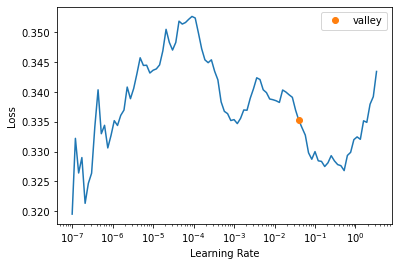

In [185]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.5, y_range=(-1, 1)).to_fp16()
sm_learner.lr_find()

In [186]:
sm_learner.fit_one_cycle(5, 4e-2)

epoch,train_loss,valid_loss,time
0,0.312027,0.308440,00:05
1,0.306480,0.309759,00:05
2,0.303533,0.299006,00:05
3,0.279293,0.279934,00:05
4,0.235366,0.259502,00:05


Promising results as train_loss is decreasing much slower, while valid_loss is decreasing at the same rate

SuggestedLRs(valley=0.0012022644514217973)

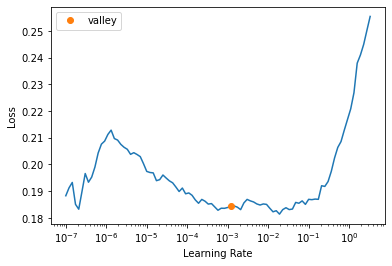

In [187]:
sm_learner.lr_find()

In [188]:
sm_learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,time
0,0.184462,0.256629,00:05
1,0.182399,0.250869,00:05
2,0.174043,0.247786,00:05
3,0.167452,0.246912,00:05
4,0.150145,0.246044,00:05
5,0.138956,0.245675,00:05
6,0.120467,0.245163,00:05
7,0.108271,0.244916,00:05
8,0.095555,0.244818,00:05
9,0.093362,0.244792,00:05


SuggestedLRs(valley=0.04786301031708717)

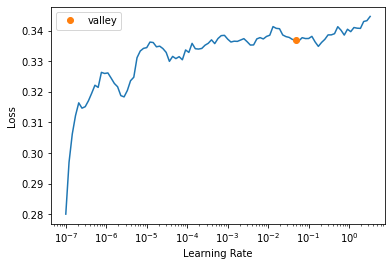

In [193]:
sm_learner = collab_learner(jokes_sm_dls, n_factors=50, wd=0.75, y_range=(-1, 1)).to_fp16()
sm_learner.lr_find()

In [194]:
sm_learner.fit_one_cycle(5, 0.05)

epoch,train_loss,valid_loss,time
0,0.309779,0.312724,00:05
1,0.310569,0.315319,00:05
2,0.311950,0.307953,00:05
3,0.297284,0.292830,00:05
4,0.264584,0.268046,00:05


SuggestedLRs(valley=0.002511886414140463)

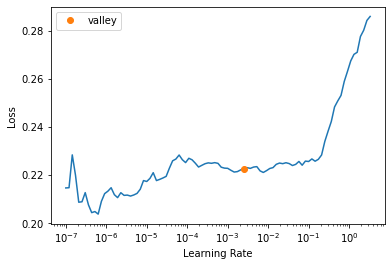

In [195]:
sm_learner.lr_find()

In [196]:
sm_learner.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,time
0,0.211026,0.259801,00:05
1,0.232143,0.257719,00:05
2,0.247071,0.259960,00:05
3,0.241154,0.257525,00:05
4,0.235631,0.256400,00:05
5,0.228593,0.253867,00:05
6,0.213348,0.250745,00:05
7,0.195156,0.249025,00:05
8,0.171279,0.248213,00:05
9,0.158245,0.248077,00:05


SuggestedLRs(valley=0.0012022644514217973)

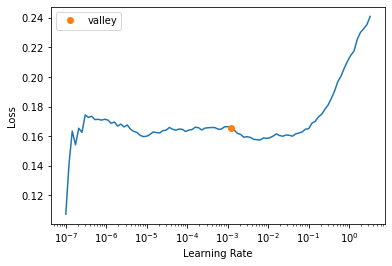

In [197]:
sm_learner.lr_find()

In [198]:
sm_learner.fit_one_cycle(10, 0.001)

epoch,train_loss,valid_loss,time
0,0.171629,0.248210,00:05
1,0.199990,0.249199,00:05
2,0.214659,0.251147,00:05
3,0.217371,0.251043,00:05
4,0.204317,0.250087,00:05
5,0.193048,0.249116,00:05
6,0.178082,0.248188,00:05
7,0.173360,0.247669,00:05
8,0.164527,0.247424,00:05
9,0.153717,0.247385,00:05


In [213]:
data_small

,user_id,joke_id,rating
0,1,7,-0.928125
1,2,7,0.993750
2,3,7,-0.984375
3,4,7,0.475000
4,5,7,-0.909375
...,...,...,...
439235,54901,19,-0.900000
439236,54902,19,0.996875
439237,54903,19,-0.434375
439238,54904,19,0.415625


<AxesSubplot:ylabel='Frequency'>

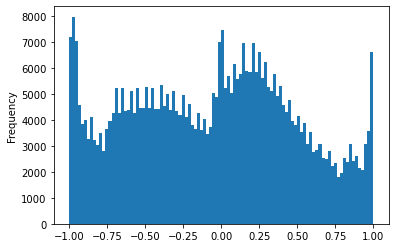

In [222]:
data_small['rating'].plot.hist(bins=100)

In [230]:
sm_learner = collab_learner?

Signature:
collab_learner(
    dls,
    n_factors=50,
    use_nn=False,
    emb_szs=None,
    layers=None,
    config=None,
    y_range=None,
    loss_func=None,
    opt_func=<function Adam at 0x7fd419a53950>,
    lr=0.001,
    splitter=<function trainable_params at 0x7fd4235e2dd0>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Docstring: Create a Learner for collaborative filtering on `dls`.
File:      /opt/conda/lib/python3.7/site-packages/fastai/collab.py
Type:      function


In [234]:
sm_learner = collab_learner(jokes_sm_dls, use_nn=True, y_range=(-1.5,1.5), wd=0.5)

SuggestedLRs(valley=0.007585775572806597)

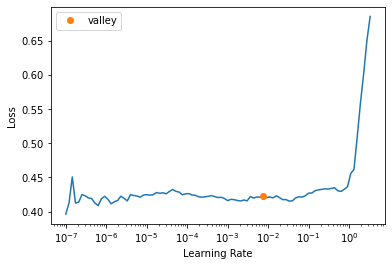

In [235]:
sm_learner.lr_find()

In [236]:
sm_learner.fit_one_cycle(10, 0.004)

epoch,train_loss,valid_loss,time
0,0.278091,0.281815,00:05
1,0.273149,0.272803,00:06
2,0.263217,0.265916,00:05
3,0.266618,0.273983,00:05
4,0.264773,0.262608,00:06
5,0.247796,0.256779,00:05
6,0.232992,0.252564,00:05
7,0.210575,0.252093,00:05
8,0.173649,0.259338,00:06
9,0.147594,0.265265,00:05


Perhpahs looking at the loss itself and trying to predict the exact rating is not quite reflective of the correct metric, as this is meant to be a recommendation system we merely wish to predict the best joke to recommend to the person. IE the network should predict what is the top rated joke by a user instead of necessarily predicting the exact rating

In general a refocus is needed in order to identify an appropriate real world metric